In [1]:
import os
import random

import numpy as np
from PIL import Image
import cv2

from keyrover import YOLO_BINARY_DATASET

from ultralytics import YOLO

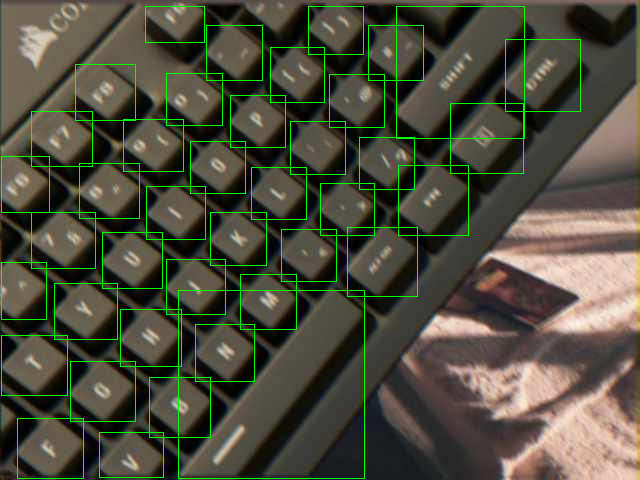

In [10]:
paths = os.listdir(f"{YOLO_BINARY_DATASET}/train/labels")
i = random.choice(paths)

img = Image.open(f"{YOLO_BINARY_DATASET}/train/images/{i.removesuffix('.txt')}.jpg")
img = np.array(img)

with open(f"{YOLO_BINARY_DATASET}/train/labels/{i}") as file:
    lines = file.readlines()

for line in lines:
    _, cx, cy, w, h = map(float, line.split())
    cx *= img.shape[1]
    cy *= img.shape[0]
    w = int(w * img.shape[1])
    h = int(h * img.shape[0])

    x1 = int(cx - w / 2)
    y1 = int(cy - h / 2)

    cv2.rectangle(img, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 1)

Image.fromarray(img)

In [11]:
import wandb
from wandb.integration.ultralytics import add_wandb_callback

wandb.login()

wandb: WARNING This integration is tested and supported for ultralytics v8.0.238 and below.
wandb: WARNING             Please report any issues to https://github.com/wandb/wandb/issues with the tag `yolov8`.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: bhavye-mathur. Use `wandb login --relogin` to force relogin


True

In [18]:
wandb.finish()
wandb.init(project="mrover-keyboard-detection-yolo")

model = YOLO("yolo11n.pt")

add_wandb_callback(model, enable_model_checkpointing=True)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [ ]:
!wandb enabled

results = model.train(data=f"{YOLO_BINARY_DATASET}/data.yaml", time=7.5, patience=10, batch=32, single_cls=True, imgsz=320,
                      cache=True, verbose=True, device="mps", plots=True, project="mrover-keyboard-detection-yolo")